In [1]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple, Counter, defaultdict
from math import log2
import sys

from sklearn import model_selection

%matplotlib inline

In [2]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(12, 7))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

In [6]:
path = './crime 10.34.40.csv'
dataset = read_csv(path, sep=';', na_values=".", header='infer', dtype=str)
dataset

TYPE  YEAR MONTH DAY HOUR  \
0                                          Other Theft  2003     5  12   16   
1                                          Other Theft  2003     5   7   15   
2                                          Other Theft  2003     4  23   16   
3                                          Other Theft  2003     4  20   11   
4                                          Other Theft  2003     4  12   17   
5                                          Other Theft  2003     3  26   20   
6                    Break and Enter Residential/Other  2003     3  10   12   
7                                             Mischief  2003     6  28    4   
8                                          Other Theft  2003     2  16    9   
9                    Break and Enter Residential/Other  2003     7   9   18   
10                                         Other Theft  2003     1  31   19   
11                                            Mischief  2003     9  27    1   
12                   Break and Enter Residential/Other  2003     4  19   18   
13                   Break and Enter Residential/Other  2003     9  24   18   
14                   Break and Enter Residential/Other  2003    11   5    8   
15                          Break and Enter Commercial  2003     9  26    2   
16                   Break and Enter Residential/Other  2003    10  21   10   
17                                         Other Theft  2003     1  25   12   
18                                         Other Theft  2003     1   9    6   
19                                         Other Theft  2003     4  30   13   
20                                         Other Theft  2003    12  12   15   
21                                         Other Theft  2003     3   7   16   
22                                            Mischief  2003     1  23   23   
23                                            Mischief  2003     4   1    0   
24                                            Mischief  2003     6  29    0   
25                                            Mischief  2003    10  16   14   
26                                         Other Theft  2003     1  28   10   
27                                  Theft from Vehicle  2003     8   5   12   
28                                  Theft from Vehicle  2003     6  17   16   
29                                  Theft from Vehicle  2003     6  13   12   
..                                                 ...   ...   ...  ..  ...   
192                                        Other Theft  2017     2  25    9   
193                                 Theft from Vehicle  2017     6  30   12   
194                                   Theft of Bicycle  2017     6  20   19   
195                                 Theft from Vehicle  2017     4   8   15   
196                                        Other Theft  2017     2   7   14   
197                                        Other Theft  2017     5   3   16   
198                                 Theft from Vehicle  2017     4  25    6   
199                                 Theft from Vehicle  2017     1   2    1   
200                                   Theft of Vehicle  2017     1  11   22   
201                                 Theft from Vehicle  2017     3  16   18   
202                  Break and Enter Residential/Other  2017     5  13   20   
203                  Break and Enter Residential/Other  2017     6   7    8   
204                                   Theft of Bicycle  2017     4  22    8   
205                         Break and Enter Commercial  2017     2   2    8   
206                                   Theft of Bicycle  2017     4  25   23   
207                                        Other Theft  2017     3  12   15   
208                                           Mischief  2017     4  15   14   
209                                 Theft from Vehicle  2017     6  19    8   
210  Vehicle Collision or Pedestrian Struck (with I...  2017     7  10    9   
211                  

In [34]:
# select features
Y = dataset['NEIGHBOURHOOD']
X = dataset[['TYPE', 'YEAR']]

In [13]:
X_class = pd.crosstab(dataset['TYPE'], dataset['YEAR'])
X_class

YEAR                                                2003  2017
TYPE                                                          
Break and Enter Commercial                             7     1
Break and Enter Residential/Other                     24     6
Mischief                                              34     4
Other Theft                                           29     5
Theft from Vehicle                                    93     9
Theft of Bicycle                                       0     4
Theft of Vehicle                                       0     3
Vehicle Collision or Pedestrian Struck (with In...     0     3

Text(0,0.5,'RATE OF CRIMES')

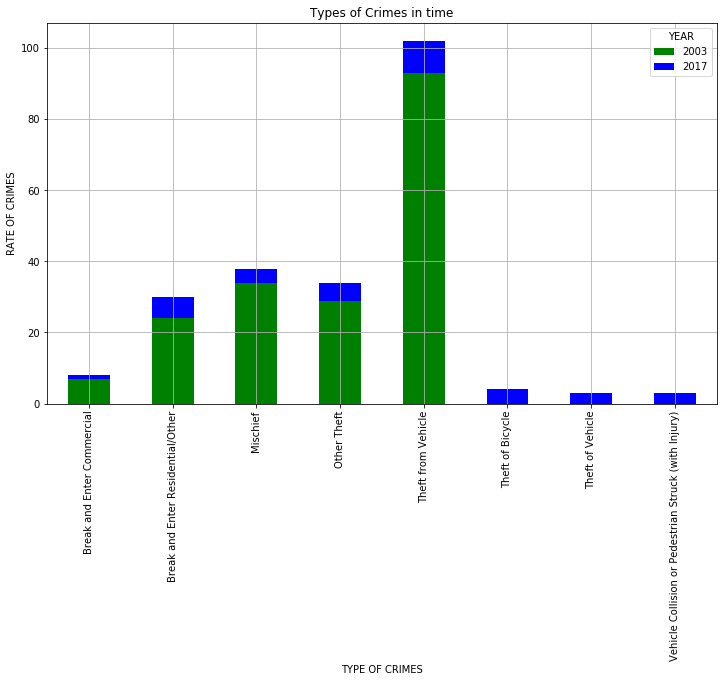

In [14]:
X_class.plot(kind='bar', stacked=True, color=['green','blue'], grid=True, title='Types of Crimes in time')
plt.xlabel('TYPE OF CRIMES')
plt.ylabel('RATE OF CRIMES')

In [15]:
Y_elements = sorted(Y.unique())
Y_elements

['Arbutus Ridge',
 'Central Business District',
 'Dunbar-Southlands',
 'Fairview',
 'Grandview-Woodland',
 'Hastings-Sunrise',
 'Kensington-Cedar Cottage',
 'Kerrisdale',
 'Kitsilano',
 'Marpole',
 'Mount Pleasant',
 'Renfrew-Collingwood',
 'Shaughnessy',
 'Stanley Park',
 'Strathcona',
 'Sunset',
 'Victoria-Fraserview',
 'West End',
 'West Point Grey']

In [16]:
# class distribution of Y
Y_class = dataset.groupby('NEIGHBOURHOOD').size()
print(Y_class)

NEIGHBOURHOOD
Arbutus Ridge                 1
Central Business District    94
Dunbar-Southlands            17
Fairview                      5
Grandview-Woodland           20
Hastings-Sunrise              3
Kensington-Cedar Cottage     11
Kerrisdale                    2
Kitsilano                     5
Marpole                       1
Mount Pleasant                6
Renfrew-Collingwood           1
Shaughnessy                   1
Stanley Park                  1
Strathcona                   15
Sunset                        3
Victoria-Fraserview           7
West End                     27
West Point Grey               2
dtype: int64


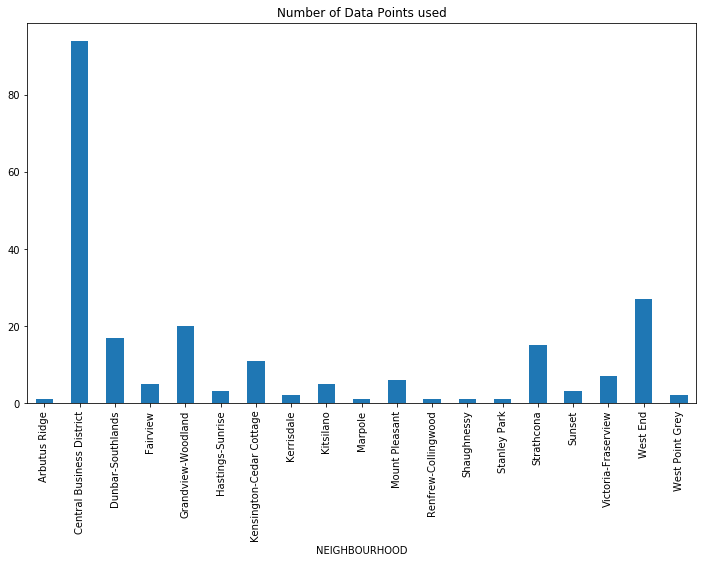

In [17]:
Y_class.plot(kind='bar', title = 'Number of Data Points used')

In [18]:
Y_class = pd.crosstab(dataset['NEIGHBOURHOOD'], dataset['YEAR'])
Y_class

YEAR                       2003  2017
NEIGHBOURHOOD                        
Arbutus Ridge                 0     1
Central Business District    88     6
Dunbar-Southlands            16     1
Fairview                      3     2
Grandview-Woodland           17     3
Hastings-Sunrise              1     2
Kensington-Cedar Cottage     11     0
Kerrisdale                    1     1
Kitsilano                     0     5
Marpole                       0     1
Mount Pleasant                0     6
Renfrew-Collingwood           1     0
Shaughnessy                   1     0
Stanley Park                  0     1
Strathcona                   14     1
Sunset                        2     1
Victoria-Fraserview           5     2
West End                     25     2
West Point Grey               2     0

Text(0,0.5,'RATE OF CRIMES')

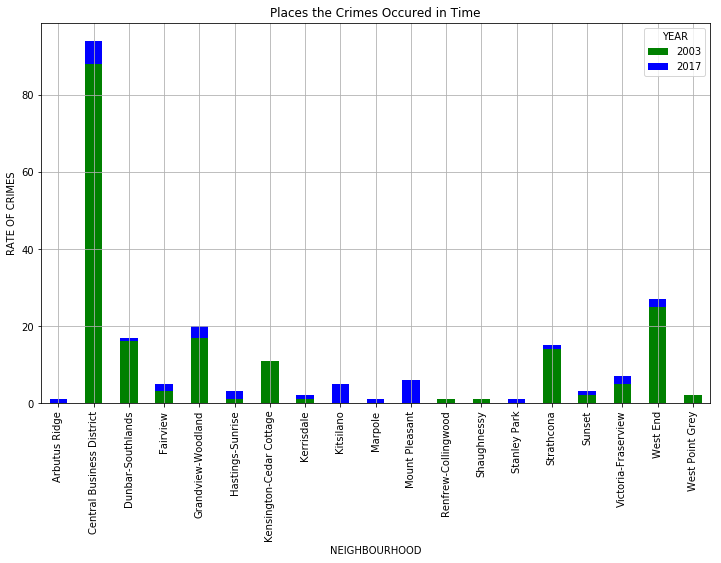

In [19]:
Y_class.plot(kind='bar', stacked=True, color=['green','blue'], grid=True, title='Places the Crimes Occured in Time')
plt.xlabel('NEIGHBOURHOOD')
plt.ylabel('RATE OF CRIMES')

In [20]:
date = pd.crosstab(dataset['MONTH'], dataset['YEAR'])
date

YEAR   2003  2017
MONTH            
1        22     5
2         9     4
3        12     8
4        21     6
5        23     4
6        17     7
7        10     1
8        16     0
9        21     0
10       16     0
11        9     0
12       11     0

Text(0,0.5,'RATE OF CRIMES')

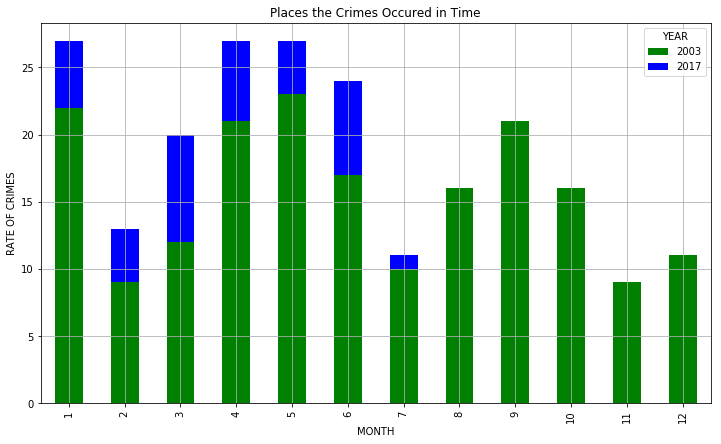

In [21]:
date.plot(kind='bar', stacked=True, color=['green','blue'], grid=True, title='Places the Crimes Occured in Time')
plt.xlabel('MONTH')
plt.ylabel('RATE OF CRIMES')

In [22]:
day = pd.crosstab(dataset['DAY'], dataset['YEAR'])
day

YEAR  2003  2017
DAY             
1        6     0
2        8     2
3        6     2
4        5     1
5        8     1
6        4     1
7        7     2
8        6     1
9        7     1
10      12     2
11       7     1
12      10     1
13       6     1
14       3     1
15       4     2
16       8     2
17       6     1
18       6     1
19       3     1
20       3     1
21       7     0
22       4     1
23       6     0
24      10     0
25       8     5
26       4     1
27       5     0
28       4     0
29       6     1
30       7     2
31       1     0

Text(0,0.5,'RATE OF CRIMES')

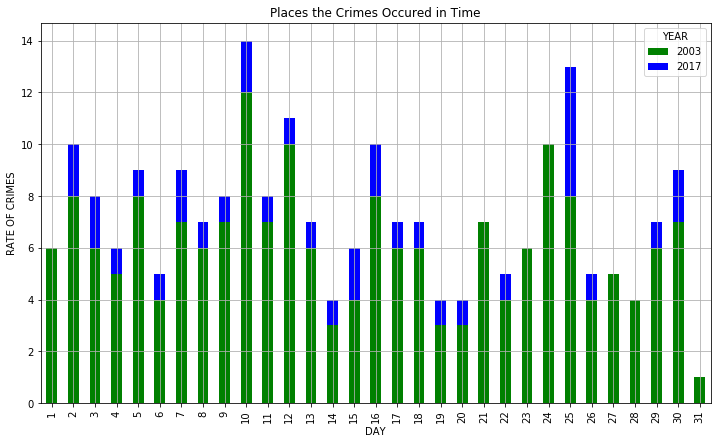

In [23]:
day.plot(kind='bar', stacked=True, color=['green','blue'], grid=True, title='Places the Crimes Occured in Time')
plt.xlabel('DAY')
plt.ylabel('RATE OF CRIMES')

In [24]:
time = pd.crosstab(dataset['HOUR'], dataset['YEAR'])
time

YEAR  2003  2017
HOUR            
0       12     1
1        5     3
2        3     0
3        1     0
4        5     0
5        2     0
6        3     1
7        3     0
8        9     4
9        9     3
10       8     1
11       2     0
12       6     2
13       8     0
14      10     3
15      10     3
16       8     1
17      10     3
18      16     1
19       5     2
20      10     2
21      14     0
22      19     4
23       9     1

Text(0,0.5,'RATE OF CRIMES')

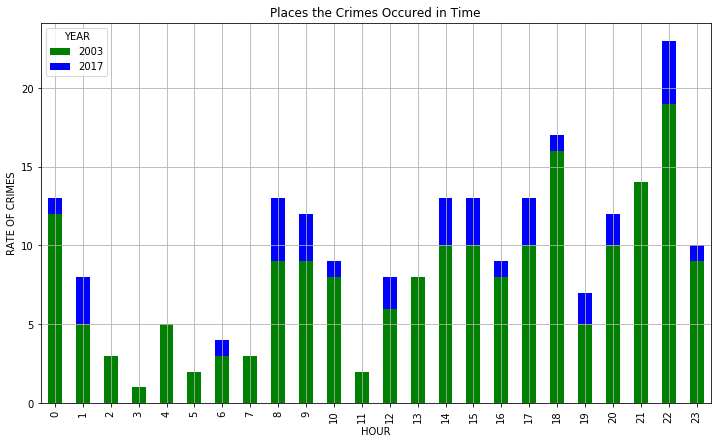

In [34]:
time.plot(kind='bar', stacked=True, color=['green','blue'], grid=True, title='Places the Crimes Occured in Time')
plt.xlabel('HOUR')
plt.ylabel('RATE OF CRIMES')

In [177]:
Z_class = pd.crosstab(dataset['NEIGHBOURHOOD'], dataset['TYPE'])
Z_class

TYPE                       Break and Enter Commercial  \
NEIGHBOURHOOD                                           
Arbutus Ridge                                       0   
Central Business District                           2   
Dunbar-Southlands                                   0   
Fairview                                            0   
Grandview-Woodland                                  0   
Hastings-Sunrise                                    0   
Kensington-Cedar Cottage                            0   
Kerrisdale                                          0   
Kitsilano                                           0   
Marpole                                             0   
Mount Pleasant                                      0   
Renfrew-Collingwood                                 0   
Shaughnessy                                         0   
Stanley Park                                        0   
Strathcona                                          1   
Sunset                                              0   
Victoria-Fraserview                                 0   
West End                                            5   
West Point Grey                                     0   

TYPE                       Break and Enter Residential/Other  Mischief  \
NEIGHBOURHOOD                                                            
Arbutus Ridge                                              0         0   
Central Business District                                  0         1   
Dunbar-Southlands                                          1        16   
Fairview                                                   1         0   
Grandview-Woodland                                        16         4   
Hastings-Sunrise                                           1         0   
Kensington-Cedar Cottage                                   0         9   
Kerrisdale                                                 2         0   
Kitsilano                                                  2         0   
Marpole                                                    0         0   
Mount Pleasant                                             0         1   
Renfrew-Collingwood                                        0         1   
Shaughnessy                                                0         1   
Stanley Park                                               0         0   
Strathcona                                                 0         0   
Sunset                                                     2         0   
Victoria-Fraserview                                        5         0   
West End                                                   0         3   
West Point Grey                                            0         2   

TYPE                       Other Theft  Theft from Vehicle  Theft of Bicycle  \
NEIGHBOURHOOD                                                                  
Arbutus Ridge                        0                   0                 1   
Central Business District           14                  77                 0   
Dunbar-Southlands                    0                   0                 0   
Fairview                             0                   3                 0   
Grandview-Woodland                   0                   0                 0   
Hastings-Sunrise                     0                   1                 0   
Kensington-Cedar Cottage             0                   2                 0   
Kerrisdale                           0                   0                 0   
Kitsilano                            1                   0                 2   
Marpole                              0                   0                 0   
Mount Pleasant                       0                   4                 0   
Renfrew-Collingwood                  0                   0                 0   
Shaughnessy                          0                   0                 0   
Stanley Park                         0         

Text(0,0.5,'RATE OF CRIMES')

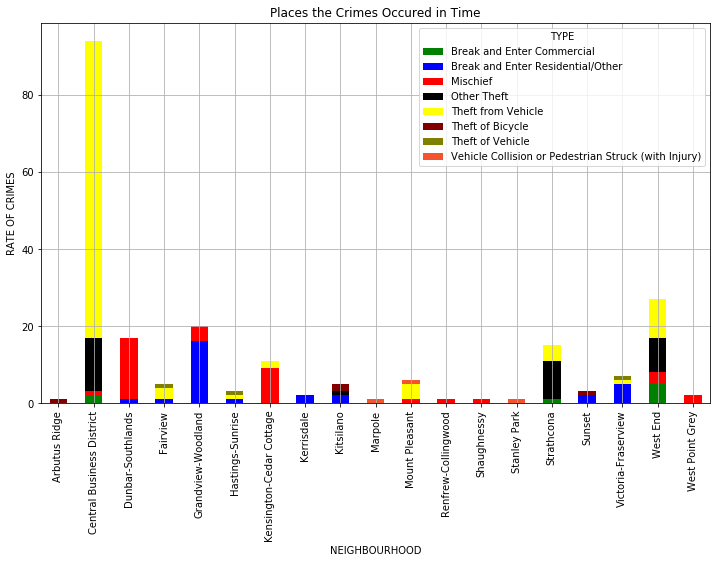

In [57]:
Z_class.plot(kind='bar', stacked=True, color=['green','blue','red','black','yellow','Maroon','Olive','#f3542d'], grid=True, title='Places the Crimes Occured in Time')
plt.xlabel('NEIGHBOURHOOD')
plt.ylabel('RATE OF CRIMES')

In [301]:
path1 = './crime.csv'
data = read_csv(path1, sep=';', na_values=".", header='infer', dtype=str)
data

TYPE  YEAR MONTH DAY HOUR  \
0                                          Other Theft  2003     5  12   16   
1                                          Other Theft  2003     5   7   15   
2                                          Other Theft  2003     4  23   16   
3                                          Other Theft  2003     4  20   11   
4                                          Other Theft  2003     4  12   17   
5                                          Other Theft  2003     3  26   20   
6                    Break and Enter Residential/Other  2003     3  10   12   
7                                             Mischief  2003     6  28    4   
8                                          Other Theft  2003     2  16    9   
9                    Break and Enter Residential/Other  2003     7   9   18   
10                                         Other Theft  2003     1  31   19   
11                                            Mischief  2003     9  27    1   
12                   Break and Enter Residential/Other  2003     4  19   18   
13                   Break and Enter Residential/Other  2003     9  24   18   
14                   Break and Enter Residential/Other  2003    11   5    8   
15                          Break and Enter Commercial  2003     9  26    2   
16                   Break and Enter Residential/Other  2003    10  21   10   
17                                         Other Theft  2003     1  25   12   
18                                         Other Theft  2003     1   9    6   
19                                         Other Theft  2003     4  30   13   
20                                         Other Theft  2003    12  12   15   
21                                         Other Theft  2003     3   7   16   
22                                            Mischief  2003     1  23   23   
23                                            Mischief  2003     4   1    0   
24                                            Mischief  2003     6  29    0   
25                                            Mischief  2003    10  16   14   
26                                         Other Theft  2003     1  28   10   
27                                  Theft from Vehicle  2003     8   5   12   
28                                  Theft from Vehicle  2003     6  17   16   
29                                  Theft from Vehicle  2003     6  13   12   
..                                                 ...   ...   ...  ..  ...   
192                                        Other Theft  2017     2  25    9   
193                                 Theft from Vehicle  2017     6  30   12   
194                                   Theft of Bicycle  2017     6  20   19   
195                                 Theft from Vehicle  2017     4   8   15   
196                                        Other Theft  2017     2   7   14   
197                                        Other Theft  2017     5   3   16   
198                                 Theft from Vehicle  2017     4  25    6   
199                                 Theft from Vehicle  2017     1   2    1   
200                                   Theft of Vehicle  2017     1  11   22   
201                                 Theft from Vehicle  2017     3  16   18   
202                  Break and Enter Residential/Other  2017     5  13   20   
203                  Break and Enter Residential/Other  2017     6   7    8   
204                                   Theft of Bicycle  2017     4  22    8   
205                         Break and Enter Commercial  2017     2   2    8   
206                                   Theft of Bicycle  2017     4  25   23   
207                                        Other Theft  2017     3  12   15   
208                                           Mischief  2017     4  15   14   
209                                 Theft from Vehicle  2017     6  19    8   
210  Vehicle Collision or Pedestrian Struck (with I...  2017     7  10    9   
211                  

In [ ]:
T_class = pd.crosstab(data['TYPE'], data['PRIORITY'])
T_class

Text(0,0.5,'RATE OF CRIMES')

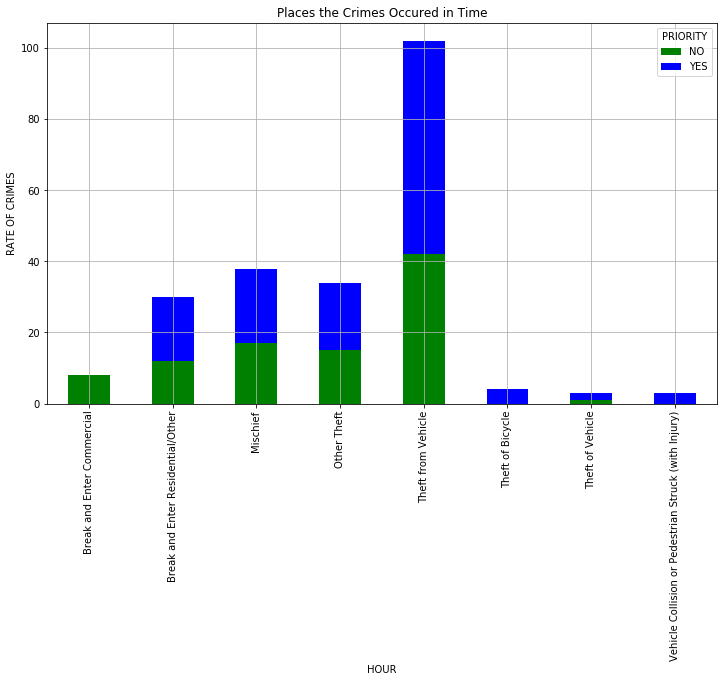

In [182]:
T_class.plot(kind='bar', stacked=True, color=['green','blue'], grid=True, title='Places the Crimes Occured in Time')
plt.xlabel('HOUR')
plt.ylabel('RATE OF CRIMES')

In [476]:
ind_data = data[['TYPE','PRIORITY']]

In [477]:
x0 = ind_data[ind_data['TYPE'] == 'Other Theft']
x1 = ind_data[ind_data['TYPE'] == 'Break and Enter Commercial']
x2 = ind_data[ind_data['TYPE'] == 'Break and Enter Residential/Other']
x3 = ind_data[ind_data['TYPE'] == 'Mischief']
x4 = ind_data[ind_data['TYPE'] == 'Theft from Vehicle']
x5 = ind_data[ind_data['TYPE'] == 'Theft of Bicycle']
x6 = ind_data[ind_data['TYPE'] == 'Theft of Vehicle']
x7 = ind_data[ind_data['TYPE'] == 'Vehicle Collision or Pedestrian Struck (with Injury)']

In [427]:
# droping data that will not used
X = data['PRIORITY']
Y = data[['TYPE','HUNDRED_BLOCK','NEIGHBOURHOOD']]

In [344]:
def entropy(element):
    """
    Calculate Shannon entropy
    :param attribute_data: data from a single feature/attribute
    :return: a float representing the Shannon entropy
    H(X) = -sum(Prob(X) * log2(Prob(X)))
    """
    _, val_freqs = np.unique(element, return_counts=True)
    # probabilities for each unique attribute value
    val_probs = val_freqs / len(element)
    return -np.sum(val_probs * (np.log2(val_probs)))

In [336]:
def get_count_dict(elements):
    """
    Return the unique values and their frequencies as a dictionary
    :param data: a 1-D numpy array
    :return:
    """
    data_values, data_freqs = np.unique(elements, return_counts=True)
    return dict(zip(data_values, data_freqs))

In [380]:
def info_gain(X, element):
    """
    Calculate information gain
    :param attribute_data: data from single attribute
    :param labels:
    :return: a float representing information gain
    Gain(X,Y) = H(X) - H(X, Y)
    """
    attr_val_counts = get_count_dict(element)
    print ("attr_val_counts = ",attr_val_counts)
    total_count = len(element)
    print ("total_count = ",total_count)
    S = 0
    for attr_val, attr_val_count in attr_val_counts.items():
        pi = attr_val_count / total_count
        print ('pi =',pi)
        E = - np.sum(pi * (np.log2(pi)))
        print ('attr_val_count =',attr_val_count)
        print ('attr_val =',attr_val)
        print ("E = ",E)
        gain = entropy(element) - (E / total_count)
        print ("Gain = ",gain)

    return gain

In [421]:
# 60% - Train set,
# 20% - Validation set,
# 20% - Test set

# The Training set is used to fit the models; 
# The Validation set is used to estimate prediction error for model selection; 
# The Test set is used for assessment of the generalization error of the final chosen model. 


def train_validate_test_split(data, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    permut = np.random.permutation(data.index)
    m = len(data.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = data.ix[permut[: train_end]]
    validate = data.ix[permut[train_end : validate_end]]
    test = data.ix[permut[validate_end : ]]
    return train, validate, test

In [537]:
train, validate, test = train_validate_test_split(data)

In [533]:
train

TYPE  YEAR MONTH DAY HOUR  \
66                          Break and Enter Commercial  2003    12  25    5   
12                   Break and Enter Residential/Other  2003     4  19   18   
78                                  Theft from Vehicle  2003    12  19   17   
85                                  Theft from Vehicle  2003     9  30    0   
60                          Break and Enter Commercial  2003     5  14    1   
88                                  Theft from Vehicle  2003     1   2   23   
160                                           Mischief  2003     1  27    3   
14                   Break and Enter Residential/Other  2003    11   5    8   
163                  Break and Enter Residential/Other  2003     5  12    9   
123                                 Theft from Vehicle  2003     3   7    0   
116                                 Theft from Vehicle  2003     4  24   16   
45                                         Other Theft  2003     2   4   23   
165                                           Mischief  2003     6  24    9   
79                                            Mischief  2003     9  25   21   
108                                 Theft from Vehicle  2003     9   9   13   
37                                            Mischief  2003     9   2    9   
69                                  Theft from Vehicle  2003     1  21    9   
180                  Break and Enter Residential/Other  2003     1  21   21   
115                                 Theft from Vehicle  2003     5  16   22   
210  Vehicle Collision or Pedestrian Struck (with I...  2017     7  10    9   
182                  Break and Enter Residential/Other  2003     7   3   23   
172                                 Theft from Vehicle  2003     6  17   15   
0                                          Other Theft  2003     5  12   16   
164                                           Mischief  2003     6  17   12   
177                                 Theft from Vehicle  2003    12  23    0   
174                                 Theft from Vehicle  2003     5   4   21   
24                                            Mischief  2003     6  29    0   
152                                 Theft from Vehicle  2003     8  15    0   
154                                 Theft from Vehicle  2003     3   3   18   
202                  Break and Enter Residential/Other  2017     5  13   20   
..                                                 ...   ...   ...  ..  ...   
2                                          Other Theft  2003     4  23   16   
135                                 Theft from Vehicle  2003     9   7   18   
190                  Break and Enter Residential/Other  2017     4  30    1   
7                                             Mischief  2003     6  28    4   
151                                 Theft from Vehicle  2003     1  23   18   
196                                        Other Theft  2017     2   7   14   
20                                         Other Theft  2003    12  12   15   
72                                  Theft from Vehicle  2003     1  13   14   
208                                           Mischief  2017     4  15   14   
9                    Break and Enter Residential/Other  2003     7   9   18   
18                                         Other Theft  2003     1   9    6   
127                  Break and Enter Residential/Other  2003    10   9    5   
11                                            Mischief  2003     9  27    1   
59                                            Mischief  2003     4  13   22   
129                                 Theft from Vehicle  2003     1  23   10   
99                                  Theft from Vehicle  2003     9  21   19   
105                                 Theft from Vehicle  2003    10  29    8   
61                                         Other Theft  2003     7   1   13   
211                                   Theft of Bicycle  2017     3  15   17   
84                   

In [534]:
validate

TYPE  YEAR MONTH DAY HOUR  \
114                  Break and Enter Residential/Other  2003     9   9    9   
159                                 Theft from Vehicle  2003     5   2   21   
139                                 Theft from Vehicle  2003     5  10    8   
170                                 Theft from Vehicle  2003     1   1    4   
38                                            Mischief  2003     3  18    0   
188  Vehicle Collision or Pedestrian Struck (with I...  2017     3  25   19   
113                  Break and Enter Residential/Other  2003     9   6   21   
189                  Break and Enter Residential/Other  2017     3   4   10   
27                                  Theft from Vehicle  2003     8   5   12   
171                                 Theft from Vehicle  2003     1   1    0   
49                                         Other Theft  2003    10   9   20   
147                                 Theft from Vehicle  2003     7  18    8   
155                                 Theft from Vehicle  2003     8   3   17   
185                                 Theft from Vehicle  2003     6  21   20   
57                                         Other Theft  2003     8   6   21   
130                                 Theft from Vehicle  2003     4  15   18   
58                                         Other Theft  2003     7  30   20   
136                                 Theft from Vehicle  2003    11  29   13   
175                  Break and Enter Residential/Other  2003     7  12   17   
55                                         Other Theft  2003     8  30   16   
64                                            Mischief  2003    10  29   22   
121                                 Theft from Vehicle  2003     3   7   21   
15                          Break and Enter Commercial  2003     9  26    2   
148                                           Mischief  2003     2  10    1   
106                         Break and Enter Commercial  2003    11   2   18   
41                                         Other Theft  2003     5  28   18   
89                                  Theft from Vehicle  2003     9  12   14   
65                   Break and Enter Residential/Other  2003    11  10    8   
198                                 Theft from Vehicle  2017     4  25    6   
158                                 Theft from Vehicle  2003     7  17   10   
203                  Break and Enter Residential/Other  2017     6   7    8   
5                                          Other Theft  2003     3  26   20   
13                   Break and Enter Residential/Other  2003     9  24   18   
132                                 Theft from Vehicle  2003     4  11   17   
140                                           Mischief  2003    12  14   14   
144                                 Theft from Vehicle  2003     5   8    0   
53                                  Theft from Vehicle  2003     5  10   22   
32                                  Theft from Vehicle  2003     4  21   17   
94                                  Theft from Vehicle  2003     8  26   23   
1                                          Other Theft  2003     5   7   15   
82                                  Theft from Vehicle  2003     9  24   10   
56                                            Mischief  2003    10  16   22   
83                                  Theft from Vehicle  2003     8  12    4   
107                                 Theft from Vehicle  2003    10  11   23   

    MINUTE        HUNDRED_BLOCK              NEIGHBOURHOOD     Latitude  \
114      0       18XX E 7TH AVE         Grandview-Woodland  49.26420058   
159      0         11XX HOWE ST  Central Business District  49.27866939   
139      0    11XX PACIFIC BLVD  Central Business District  49.27441867   
170     15         11XX HOWE ST  Central Business District  49.27866939   
38      30      40XX W 31ST AVE          Dunbar-Southlands  49.24425895   
188     30  X STANLEY PARK CSWY             

In [535]:
test

TYPE  YEAR MONTH DAY HOUR MINUTE  \
212                   Theft of Vehicle  2017     3  10    0      0   
142                 Theft from Vehicle  2003     1   7   20      0   
67                  Theft from Vehicle  2003     4   7   22      0   
34                  Theft from Vehicle  2003     8  19    6     15   
80                  Theft from Vehicle  2003    11   6   11      0   
122  Break and Enter Residential/Other  2003     4  28    8      0   
42   Break and Enter Residential/Other  2003     6  30   23      0   
95                            Mischief  2003     9   9   21      0   
103                           Mischief  2003     8   2    4      0   
10                         Other Theft  2003     1  31   19     45   
92                  Theft from Vehicle  2003     8  11   17     30   
197                        Other Theft  2017     5   3   16      7   
181  Break and Enter Residential/Other  2003     5   5   14      0   
91                  Theft from Vehicle  2003    12  17   21      0   
36                         Other Theft  2003    12   1   14     37   
19                         Other Theft  2003     4  30   13      6   
81                  Theft from Vehicle  2003     9  24   17      0   
153  Break and Enter Residential/Other  2003     2  24   15      0   
220                 Theft from Vehicle  2017     6   5   17      0   
100                 Theft from Vehicle  2003     2  10   22     30   
186                 Theft from Vehicle  2003     6  16   21      0   
30                  Theft from Vehicle  2003     6  11   15      0   
124         Break and Enter Commercial  2003     9  16    1     45   
204                   Theft of Bicycle  2017     4  22    8      0   
207                        Other Theft  2017     3  12   15      7   
183                 Theft from Vehicle  2003     7   8    7     45   
40                         Other Theft  2003    10  11   10     20   
179         Break and Enter Commercial  2003     6  21   20     30   
17                         Other Theft  2003     1  25   12     30   
173                 Theft from Vehicle  2003     5   5   14     30   
4                          Other Theft  2003     4  12   17     45   
52                  Theft from Vehicle  2003     5  12    8      6   
71                            Mischief  2003    10   4   17      0   
217                           Mischief  2017     1  18   14     44   
161                           Mischief  2003     2  13   15      0   
191                   Theft of Vehicle  2017     1  16    1      7   
143                 Theft from Vehicle  2003     9   5    0      0   
74                  Theft from Vehicle  2003     5  10   22      0   
87                  Theft from Vehicle  2003     4  10   18      0   
31                            Mischief  2003    11   8   22     15   
51                  Theft from Vehicle  2003     5  22   19      0   
104                           Mischief  2003     4  18   22      0   
118                 Theft from Vehicle  2003     3  15    1     20   
218  Break and Enter Residential/Other  2017     3   3    9     16   
29                  Theft from Vehicle  2003     6  13   12      0   

          HUNDRED_BLOCK              NEIGHBOURHOOD     Latitude     Longitude  \
212   36XX CAMBRIDGE ST           Hastings-Sunrise  49.28665438  -123.0252203   
142   11XX PACIFIC BLVD  Central Business District  49.27441867  -123.1189699   
67     11XX MAINLAND ST  Central Business District  49.27472125  -123.1217449   
34    10XX BROUGHTON ST                   West End   49.2853767  -123.1336862   
80         11XX MAIN ST  Central Business District  49.27447579   -123.100081   
122    64XX DUMFRIES ST        Victoria-Fraserview  49.22578995  -123.0744603   
42       64XX ARGYLE ST        Victoria-Fraserview  49.22591829  -123.0718007   
95       40XX W 8TH AVE            West Point Grey  49.26531707   -123.195982   
103      40XX WELWYN ST   Kensington-Cedar Cottage  49.24905474  -123.0699681   
10 

In [530]:
gain4 = info_gain(X, x3)

attr_val_counts =  {'Mischief': 38, 'NO': 17, 'YES': 21}
total_count =  38
pi = 1.0
attr_val_count = 38
attr_val = Mischief
E =  -0.0
Gain =  0.991992403454
pi = 0.447368421053
attr_val_count = 17
attr_val = NO
E =  0.519155248086
Gain =  0.978330423241
pi = 0.552631578947
attr_val_count = 21
attr_val = YES
E =  0.472837155367
Gain =  0.979549320418


In [479]:
get_count_dict(x3)

{'Mischief': 38, 'NO': 17, 'YES': 21}

In [500]:

f = data[data['TYPE'] == 'Mischief']
d = f[f['PRIORITY'] == 'YES']
d

TYPE  YEAR MONTH DAY HOUR MINUTE              HUNDRED_BLOCK  \
7    Mischief  2003     6  28    4     13            40XX W 19TH AVE   
22   Mischief  2003     1  23   23      0            40XX W 27TH AVE   
24   Mischief  2003     6  29    0     30            40XX W 27TH AVE   
33   Mischief  2003     8   5   22      0               11XX HARO ST   
37   Mischief  2003     9   2    9     25            13XX FRANCES ST   
38   Mischief  2003     3  18    0     30            40XX W 31ST AVE   
59   Mischief  2003     4  13   22      0            40XX W 34TH AVE   
62   Mischief  2003     6  13    9     15            40XX W 35TH AVE   
70   Mischief  2003     9  29   22      0            40XX W 35TH AVE   
104  Mischief  2003     4  18   22      0             40XX WELWYN ST   
148  Mischief  2003     2  10    1      0             41XX DUNBAR ST   
149  Mischief  2003     2   8   20      0             41XX DUNBAR ST   
156  Mischief  2003    12   2   21     30             41XX FRASER ST   
161  Mischief  2003     2  13   15      0          41XX GLADSTONE ST   
162  Mischief  2003     5  16   13      0          41XX GLADSTONE ST   
164  Mischief  2003     6  17   12     30          41XX GLADSTONE ST   
165  Mischief  2003     6  24    9     50          41XX GLADSTONE ST   
208  Mischief  2017     4  15   14      0         14XX E HASTINGS ST   
215  Mischief  2017     5  25   20      0  E 11TH AVE / KINGSWAY AVE   
217  Mischief  2017     1  18   14     44         14XX E HASTINGS ST   
219  Mischief  2017     5  29   22     30             14XX E 7TH AVE   

                NEIGHBOURHOOD     Latitude     Longitude PRIORITY  
7           Dunbar-Southlands  49.25555918  -123.1937252      YES  
22          Dunbar-Southlands  49.24807387  -123.1948057      YES  
24          Dunbar-Southlands  49.24806975  -123.1937798      YES  
33                   West End  49.28472338  -123.1272377      YES  
37         Grandview-Woodland  49.27941482  -123.0762036      YES  
38          Dunbar-Southlands  49.24425895   -123.193814      YES  
59          Dunbar-Southlands  49.24141866  -123.1938356      YES  
62          Dunbar-Southlands  49.24057505  -123.1947133      YES  
70          Dunbar-Southlands   49.2404882  -123.1938344      YES  
104  Kensington-Cedar Cottage   49.2493029  -123.0698366      YES  
148         Dunbar-Southlands  49.24917423   -123.185138      YES  
149         Dunbar-Southlands  49.24933219  -123.1851371      YES  
156  Kensington-Cedar Cottage  49.24860929   -123.090093      YES  
161  Kensington-Cedar Cottage  49.24802757  -123.0605719      YES  
162  Kensington-Cedar Cottage  49.24802757  -123.0605719      YES  
164  Kensington-Cedar Cottage  49.24802757  -123.0605719      YES  
165  Kensington-Cedar Cottage  49.24802757  -123.0605719      YES  
208        Grandview-Woodland  49.28128613  -123.0755956      YES  
215            Mount Pleasant  49.26107142  -123.0977635      YES  
217        Grandview-Woodland  49.28127643  -123.0747459      YES  
219        Grandview-Woodland  49.26416346  -123.0751293      YES

In [525]:
gain1 = info_gain(X, x0)

attr_val_counts =  {'NO': 15, 'Other Theft': 34, 'YES': 19}
total_count =  34
pi = 0.441176470588
attr_val_count = 15
attr_val = NO
E =  0.520840696607
Gain =  0.97467394754
pi = 1.0
attr_val_count = 34
attr_val = Other Theft
E =  -0.0
Gain =  0.989992791558
pi = 0.558823529412
attr_val_count = 19
attr_val = YES
E =  0.469152094951
Gain =  0.97619420053


In [495]:
get_count_dict(x0)

{'NO': 15, 'Other Theft': 34, 'YES': 19}

In [499]:

f = data[data['TYPE'] == 'Other Theft']
d = f[f['PRIORITY'] == 'YES']
d

TYPE  YEAR MONTH DAY HOUR MINUTE     HUNDRED_BLOCK  \
0    Other Theft  2003     5  12   16     15  9XX TERMINAL AVE   
1    Other Theft  2003     5   7   15     20  9XX TERMINAL AVE   
2    Other Theft  2003     4  23   16     40  9XX TERMINAL AVE   
3    Other Theft  2003     4  20   11     15  9XX TERMINAL AVE   
4    Other Theft  2003     4  12   17     45  9XX TERMINAL AVE   
5    Other Theft  2003     3  26   20     45  9XX TERMINAL AVE   
8    Other Theft  2003     2  16    9      2  9XX TERMINAL AVE   
17   Other Theft  2003     1  25   12     30  9XX TERMINAL AVE   
18   Other Theft  2003     1   9    6     45  9XX TERMINAL AVE   
21   Other Theft  2003     3   7   16     15     9XX ROBSON ST   
35   Other Theft  2003     6  26   20     37     9XX DENMAN ST   
45   Other Theft  2003     2   4   23     50      9XX DAVIE ST   
55   Other Theft  2003     8  30   16      5    9XX BURRARD ST   
58   Other Theft  2003     7  30   20     30    9XX BURRARD ST   
187  Other Theft  2017     1  14   22     29    22XX W 4TH AVE   
192  Other Theft  2017     2  25    9     55       7XX BUTE ST   
196  Other Theft  2017     2   7   14     41    8X W PENDER ST   
197  Other Theft  2017     5   3   16      7     11XX HOMER ST   
207  Other Theft  2017     3  12   15      7     3XX ABBOTT ST   

                 NEIGHBOURHOOD     Latitude     Longitude PRIORITY  
0                   Strathcona  49.26980201  -123.0837633      YES  
1                   Strathcona  49.26980201  -123.0837633      YES  
2                   Strathcona  49.26980201  -123.0837633      YES  
3                   Strathcona  49.26980201  -123.0837633      YES  
4                   Strathcona  49.26980201  -123.0837633      YES  
5                   Strathcona  49.26980201  -123.0837633      YES  
8                   Strathcona  49.26980201  -123.0837633      YES  
17                  Strathcona  49.26980201  -123.0837633      YES  
18                  Strathcona  49.26980201  -123.0837633      YES  
21   Central Business District  49.28269223  -123.1219323      YES  
35                    West End   49.2903511  -123.1372304      YES  
45   Central Business District  49.27843487  -123.1282696      YES  
55                    West End  49.28217234  -123.1245969      YES  
58                    West End  49.28217234  -123.1245969      YES  
187                  Kitsilano  49.26820712  -123.1560819      YES  
192                   West End  49.28621328  -123.1265533      YES  
196  Central Business District  49.28094562  -123.1071512      YES  
197  Central Business District  49.27605034  -123.1219536      YES  
207  Central Business District  49.28263588  -123.1069854      YES

In [532]:
gain5 = info_gain(X, x4)

attr_val_counts =  {'NO': 42, 'Theft from Vehicle': 102, 'YES': 60}
total_count =  102
pi = 0.411764705882
attr_val_count = 42
attr_val = NO
E =  0.527103260844
Gain =  0.9722501385
pi = 1.0
attr_val_count = 102
attr_val = Theft from Vehicle
E =  -0.0
Gain =  0.977417817528
pi = 0.588235294118
attr_val_count = 60
attr_val = YES
E =  0.450314556684
Gain =  0.973002968933


In [502]:
get_count_dict(x4)

{'NO': 42, 'Theft from Vehicle': 102, 'YES': 60}

In [503]:

f = data[data['TYPE'] == 'Theft from Vehicle']
d = f[f['PRIORITY'] == 'YES']
d

TYPE  YEAR MONTH DAY HOUR MINUTE           HUNDRED_BLOCK  \
28   Theft from Vehicle  2003     6  17   16     15        11XX MAINLAND ST   
29   Theft from Vehicle  2003     6  13   12      0        11XX MAINLAND ST   
30   Theft from Vehicle  2003     6  11   15      0        11XX MAINLAND ST   
32   Theft from Vehicle  2003     4  21   17      0          11XX NOOTKA ST   
34   Theft from Vehicle  2003     8  19    6     15       10XX BROUGHTON ST   
51   Theft from Vehicle  2003     5  22   19      0        11XX MAINLAND ST   
52   Theft from Vehicle  2003     5  12    8      6        11XX MAINLAND ST   
53   Theft from Vehicle  2003     5  10   22     30        11XX MAINLAND ST   
63   Theft from Vehicle  2003     4  12    8      0        11XX MAINLAND ST   
67   Theft from Vehicle  2003     4   7   22      0        11XX MAINLAND ST   
68   Theft from Vehicle  2003     4   4   22     30        11XX MAINLAND ST   
72   Theft from Vehicle  2003     1  13   14     30        11XX MAINLAND ST   
73   Theft from Vehicle  2003     1   3   22      0        11XX MAINLAND ST   
74   Theft from Vehicle  2003     5  10   22      0        11XX MAINLAND ST   
75   Theft from Vehicle  2003     6  11   13      0        11XX MAINLAND ST   
77   Theft from Vehicle  2003     1  18   15     30        11XX MAINLAND ST   
87   Theft from Vehicle  2003     4  10   18      0            11XX MAIN ST   
88   Theft from Vehicle  2003     1   2   23     55            11XX MAIN ST   
90   Theft from Vehicle  2003     3  22   22      0     11XX LAMEYS MILL RD   
92   Theft from Vehicle  2003     8  11   17     30       11XX KINGSWAY AVE   
96   Theft from Vehicle  2003     4  13   13      0          11XX JERVIS ST   
100  Theft from Vehicle  2003     2  10   22     30          11XX JERVIS ST   
101  Theft from Vehicle  2003     7  22   22     30      11XX IRONWORK PASS   
111  Theft from Vehicle  2003     5  22   15     30            11XX HOWE ST   
115  Theft from Vehicle  2003     5  16   22     40            11XX HOWE ST   
117  Theft from Vehicle  2003     3  30   19     45            11XX HOWE ST   
118  Theft from Vehicle  2003     3  15    1     20            11XX HOWE ST   
119  Theft from Vehicle  2003     3  14   20      0            11XX HOWE ST   
123  Theft from Vehicle  2003     3   7    0     15            11XX HOWE ST   
125  Theft from Vehicle  2003     1  20    7      0            11XX HOWE ST   
128  Theft from Vehicle  2003     1   5    2      0            11XX HOWE ST   
129  Theft from Vehicle  2003     1  23   10      0          11XX JERVIS ST   
130  Theft from Vehicle  2003     4  15   18      0          11XX KEEFER ST   
132  Theft from Vehicle  2003     4  11   17     30          11XX KEEFER ST   
139  Theft from Vehicle  2003     5  10    8      0       11XX PACIFIC BLVD   
142  Theft from Vehicle  2003     1   7   20      0       11XX PACIFIC BLVD   
144  Theft from Vehicle  2003     5   8    0      0       11XX PACIFIC BLVD   
147  Theft from Vehicle  2003     7  18    8     40       11XX PACIFIC BLVD   
150  Theft from Vehicle  2003     5  15   22      0       11XX PACIFIC BLVD   
151  Theft from Vehicle  2003     1  23   18      3       11XX PACIFIC BLVD   
154  Theft from Vehicle  2003     3   3   18      0       11XX PACIFIC BLVD   
157  Theft from Vehicle  2003     7  18    8      0            11XX HOWE ST   
158  Theft from Vehicle  2003     7  17   10      0            11XX HOWE ST   
159  Theft from Vehicle  2003     5   2   21      0            11XX HOWE ST   
168  Theft from Vehicle  2003     3  30   17     40            11XX HOWE ST   
169  Theft from Vehicle  2003     1  12   18      0            11XX HOWE ST   
172  Theft from Vehicle  2003     6  17   15      0          11XX KEEFER ST   
173  Theft from Vehicle  2003     5   5   14     30            11XX HOWE ST   
174  Theft from Vehicle  2003     5   4   21     30            11XX HOWE ST   
176  Theft from Vehicle  2003     6   4   22     30     11XX LAMEYS M

In [527]:
gain3 = info_gain(X, x2)

attr_val_counts =  {'Break and Enter Residential/Other': 30, 'NO': 12, 'YES': 18}
total_count =  30
pi = 1.0
attr_val_count = 30
attr_val = Break and Enter Residential/Other
E =  -0.0
Gain =  0.970950594455
pi = 0.4
attr_val_count = 12
attr_val = NO
E =  0.528771237955
Gain =  0.953324886523
pi = 0.6
attr_val_count = 18
attr_val = YES
E =  0.4421793565
Gain =  0.956211282571


In [505]:
get_count_dict(x2)

{'Break and Enter Residential/Other': 30, 'NO': 12, 'YES': 18}

In [506]:

f = data[data['TYPE'] == 'Break and Enter Residential/Other']
d = f[f['PRIORITY'] == 'YES']
d

TYPE  YEAR MONTH DAY HOUR MINUTE  \
6    Break and Enter Residential/Other  2003     3  10   12      0   
9    Break and Enter Residential/Other  2003     7   9   18     15   
42   Break and Enter Residential/Other  2003     6  30   23      0   
47   Break and Enter Residential/Other  2003     1  25   15     39   
97   Break and Enter Residential/Other  2003     4  20    0      0   
114  Break and Enter Residential/Other  2003     9   9    9      0   
134  Break and Enter Residential/Other  2003     5   2   13     33   
146  Break and Enter Residential/Other  2003     2  10   14     37   
153  Break and Enter Residential/Other  2003     2  24   15      0   
163  Break and Enter Residential/Other  2003     5  12    9     20   
175  Break and Enter Residential/Other  2003     7  12   17      0   
181  Break and Enter Residential/Other  2003     5   5   14      0   
182  Break and Enter Residential/Other  2003     7   3   23      0   
189  Break and Enter Residential/Other  2017     3   4   10     35   
202  Break and Enter Residential/Other  2017     5  13   20     21   
203  Break and Enter Residential/Other  2017     6   7    8     28   
216  Break and Enter Residential/Other  2017     6  17   12     29   
218  Break and Enter Residential/Other  2017     3   3    9     16   

         HUNDRED_BLOCK        NEIGHBOURHOOD     Latitude     Longitude  \
6    63XX WILTSHIRE ST           Kerrisdale  49.22805078  -123.1466105   
9       18XX E 3RD AVE   Grandview-Woodland  49.26773386   -123.067654   
42      64XX ARGYLE ST  Victoria-Fraserview  49.22591829  -123.0718007   
47      64XX ARGYLE ST  Victoria-Fraserview  49.22600778   -123.071672   
97     64XX CHESTER ST               Sunset  49.22574162  -123.0894562   
114     18XX E 7TH AVE   Grandview-Woodland  49.26420058   -123.067759   
134     18XX E 7TH AVE   Grandview-Woodland  49.26419521  -123.0666271   
146     18XX E 8TH AVE   Grandview-Woodland  49.26320984  -123.0669885   
153     18XX E 8TH AVE   Grandview-Woodland  49.26320782  -123.0667586   
163     18XX E 8TH AVE   Grandview-Woodland  49.26328936  -123.0666802   
175     18XX E 8TH AVE   Grandview-Woodland  49.26320157  -123.0660432   
181  18XX E GEORGIA ST   Grandview-Woodland  49.27841223   -123.067962   
182  18XX E GEORGIA ST   Grandview-Woodland  49.27841223   -123.067962   
189       30XX PINE ST             Fairview  49.25877829  -123.1436368   
202    30XX W 27TH AVE    Dunbar-Southlands  49.24797971  -123.1731009   
203    30XX W 45TH AVE           Kerrisdale  49.23097462  -123.1735954   
216     30XX W 7TH AVE            Kitsilano  49.26589132  -123.1726975   
218     31XX ADANAC ST     Hastings-Sunrise  49.27742035  -123.0375953   

    PRIORITY  
6        YES  
9        YES  
42       YES  
47       YES  
97       YES  
114      YES  
134      YES  
146      YES  
153      YES  
163      YES  
175      YES  
181      YES  
182      YES  
189      YES  
202      YES  
203      YES  
216      YES  
218      YES

In [529]:
gain7 = info_gain(X, x6)

attr_val_counts =  {'NO': 1, 'Theft of Vehicle': 3, 'YES': 2}
total_count =  3
pi = 0.333333333333
attr_val_count = 1
attr_val = NO
E =  0.528320833574
Gain =  0.74218888953
pi = 1.0
attr_val_count = 3
attr_val = Theft of Vehicle
E =  -0.0
Gain =  0.918295834054
pi = 0.666666666667
attr_val_count = 2
attr_val = YES
E =  0.389975000481
Gain =  0.788304167228


In [508]:
get_count_dict(x6)

{'NO': 1, 'Theft of Vehicle': 3, 'YES': 2}

In [509]:
f = data[data['TYPE'] == 'Theft of Vehicle']
d = f[f['PRIORITY'] == 'YES']
d

TYPE  YEAR MONTH DAY HOUR MINUTE      HUNDRED_BLOCK  \
200  Theft of Vehicle  2017     1  11   22      0    65XX FLEMING ST   
212  Theft of Vehicle  2017     3  10    0      0  36XX CAMBRIDGE ST   

           NEIGHBOURHOOD     Latitude     Longitude PRIORITY  
200  Victoria-Fraserview  49.22516007  -123.0731018      YES  
212     Hastings-Sunrise  49.28665438  -123.0252203      YES

In [531]:
gain6 = bicycle = info_gain(X, x5)

attr_val_counts =  {'Theft of Bicycle': 4, 'YES': 4}
total_count =  4
pi = 1.0
attr_val_count = 4
attr_val = Theft of Bicycle
E =  -0.0
Gain =  0.0
pi = 1.0
attr_val_count = 4
attr_val = YES
E =  -0.0
Gain =  0.0


In [516]:
get_count_dict(x5)

{'Theft of Bicycle': 4, 'YES': 4}

In [518]:
f = data[data['TYPE'] == 'Theft of Bicycle']
d = f[f['PRIORITY'] == 'YES']
d

TYPE  YEAR MONTH DAY HOUR MINUTE    HUNDRED_BLOCK  \
194  Theft of Bicycle  2017     6  20   19      0   19XX WHYTE AVE   
204  Theft of Bicycle  2017     4  22    8      0   2XX E 51ST AVE   
206  Theft of Bicycle  2017     4  25   23      0  30XX W 12TH AVE   
211  Theft of Bicycle  2017     3  15   17      0   21XX BRIAR AVE   

     NEIGHBOURHOOD     Latitude     Longitude PRIORITY  
194      Kitsilano  49.27538423  -123.1484157      YES  
204         Sunset  49.22377513  -123.1010695      YES  
206      Kitsilano  49.26149957  -123.1728295      YES  
211  Arbutus Ridge  49.24968769  -123.1537916      YES

In [528]:
gain8 = info_gain(X, x7)

attr_val_counts =  {'Vehicle Collision or Pedestrian Struck (with Injury)': 3, 'YES': 3}
total_count =  3
pi = 1.0
attr_val_count = 3
attr_val = Vehicle Collision or Pedestrian Struck (with Injury)
E =  -0.0
Gain =  0.0
pi = 1.0
attr_val_count = 3
attr_val = YES
E =  -0.0
Gain =  0.0


In [520]:
get_count_dict(x7)

{'Vehicle Collision or Pedestrian Struck (with Injury)': 3, 'YES': 3}

In [521]:
f = data[data['TYPE'] == 'Vehicle Collision or Pedestrian Struck (with Injury)']
d = f[f['PRIORITY'] == 'YES']
d

TYPE  YEAR MONTH DAY HOUR  \
188  Vehicle Collision or Pedestrian Struck (with I...  2017     3  25   19   
210  Vehicle Collision or Pedestrian Struck (with I...  2017     7  10    9   
221  Vehicle Collision or Pedestrian Struck (with I...  2017     6   6   17   

    MINUTE          HUNDRED_BLOCK   NEIGHBOURHOOD     Latitude     Longitude  \
188     30    X STANLEY PARK CSWY    Stanley Park  49.29452892   -123.136762   
210     20  YUKON ST / W 10TH AVE  Mount Pleasant    49.262208  -123.1129226   
221     38     13XX BLOCK PARK DR         Marpole  49.21570644  -123.1345121   

    PRIORITY  
188      YES  
210      YES  
221      YES

In [526]:
gain2 = info_gain(X, x1)

attr_val_counts =  {'Break and Enter Commercial': 8, 'NO': 8}
total_count =  8
pi = 1.0
attr_val_count = 8
attr_val = Break and Enter Commercial
E =  -0.0
Gain =  0.0
pi = 1.0
attr_val_count = 8
attr_val = NO
E =  -0.0
Gain =  0.0


In [523]:
get_count_dict(x1)

{'Break and Enter Commercial': 8, 'NO': 8}

In [524]:

f = data[data['TYPE'] == 'Break and Enter Residential/Other']
d = f[f['PRIORITY'] == 'NO']
d

TYPE  YEAR MONTH DAY HOUR MINUTE  \
12   Break and Enter Residential/Other  2003     4  19   18      0   
13   Break and Enter Residential/Other  2003     9  24   18     30   
14   Break and Enter Residential/Other  2003    11   5    8     12   
16   Break and Enter Residential/Other  2003    10  21   10      0   
46   Break and Enter Residential/Other  2003    11  29    9     30   
65   Break and Enter Residential/Other  2003    11  10    8      0   
113  Break and Enter Residential/Other  2003     9   6   21     20   
122  Break and Enter Residential/Other  2003     4  28    8      0   
127  Break and Enter Residential/Other  2003    10   9    5     45   
133  Break and Enter Residential/Other  2003    12  24   12      0   
180  Break and Enter Residential/Other  2003     1  21   21     45   
190  Break and Enter Residential/Other  2017     4  30    1      0   

          HUNDRED_BLOCK        NEIGHBOURHOOD     Latitude     Longitude  \
12       18XX E 3RD AVE   Grandview-Woodland  49.26781432  -123.0674411   
13       18XX E 3RD AVE   Grandview-Woodland  49.26773083  -123.0673017   
14      63XX WINDSOR ST               Sunset  49.22642977  -123.0852834   
16       18XX E 3RD AVE   Grandview-Woodland  49.26781128  -123.0670888   
46       64XX ARGYLE ST  Victoria-Fraserview  49.22589822  -123.0716758   
65      18XX E 53RD AVE  Victoria-Fraserview  49.22187452  -123.0684485   
113      18XX E 6TH AVE   Grandview-Woodland  49.26509537  -123.0666109   
122    64XX DUMFRIES ST  Victoria-Fraserview  49.22578995  -123.0744603   
127      18XX E 7TH AVE   Grandview-Woodland  49.26419937  -123.0675115   
133      18XX E 7TH AVE   Grandview-Woodland  49.26419537  -123.0666625   
180   18XX E GEORGIA ST   Grandview-Woodland  49.27841223   -123.067962   
190  30XX POINT GREY RD            Kitsilano  49.27106919  -123.1734426   

    PRIORITY  
12        NO  
13        NO  
14        NO  
16        NO  
46        NO  
65        NO  
113       NO  
122       NO  
127       NO  
133       NO  
180       NO  
190       NO